In [6]:
# Set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tqdm
import random
import pandas as pd
from collections import Counter
from itertools import cycle

from sklearn import datasets, metrics, tree
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import spectral
import seaborn as sns 
import tqdm

import DecisionTree

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
def get_tree_error(tree, df):
    res = []
    for i in range(len(df)):
        res.append(tree.classify(df.iloc[i]))
        
    classes = pd.Series(np.array(df['target']) == np.array(res)
                    ).value_counts()
    
    if not False in classes:
        return 0
    
    return classes[False] / len(df) * 100

# 1. Mushrooms DS

In [72]:
# 1. Mushroom dataset
# https://archive.ics.uci.edu/ml/datasets/mushroom
# only categorical attributes with missing values
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

# Use read_csv to load the data.
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom_df = pd.read_csv(url, header=None, names=columns)
mushroom_idx_df = mushroom_df.reset_index()

X_mushroom_train, X_mushroom_test = train_test_split(mushroom_df, test_size=0.3333)

In [73]:
X_mushroom_train.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6824,p,k,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p
5506,p,f,y,y,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,y,g
5435,p,x,s,g,t,f,f,c,b,h,...,s,w,w,p,w,o,p,h,v,u
7592,p,k,s,n,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
6216,p,x,y,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l


In [74]:
mushroom_tree_gini = DecisionTree.Tree(X_mushroom_train, criterion='gini')
mushroom_tree_entropy = DecisionTree.Tree(X_mushroom_train, criterion='infogain_ratio')

In [75]:
print(f'Err for gini {get_tree_error(mushroom_tree_gini, X_mushroom_test)}%')
print(f'Err for entropy {get_tree_error(mushroom_tree_entropy, X_mushroom_test)}%')

Err for gini 0%
Err for entropy 0%


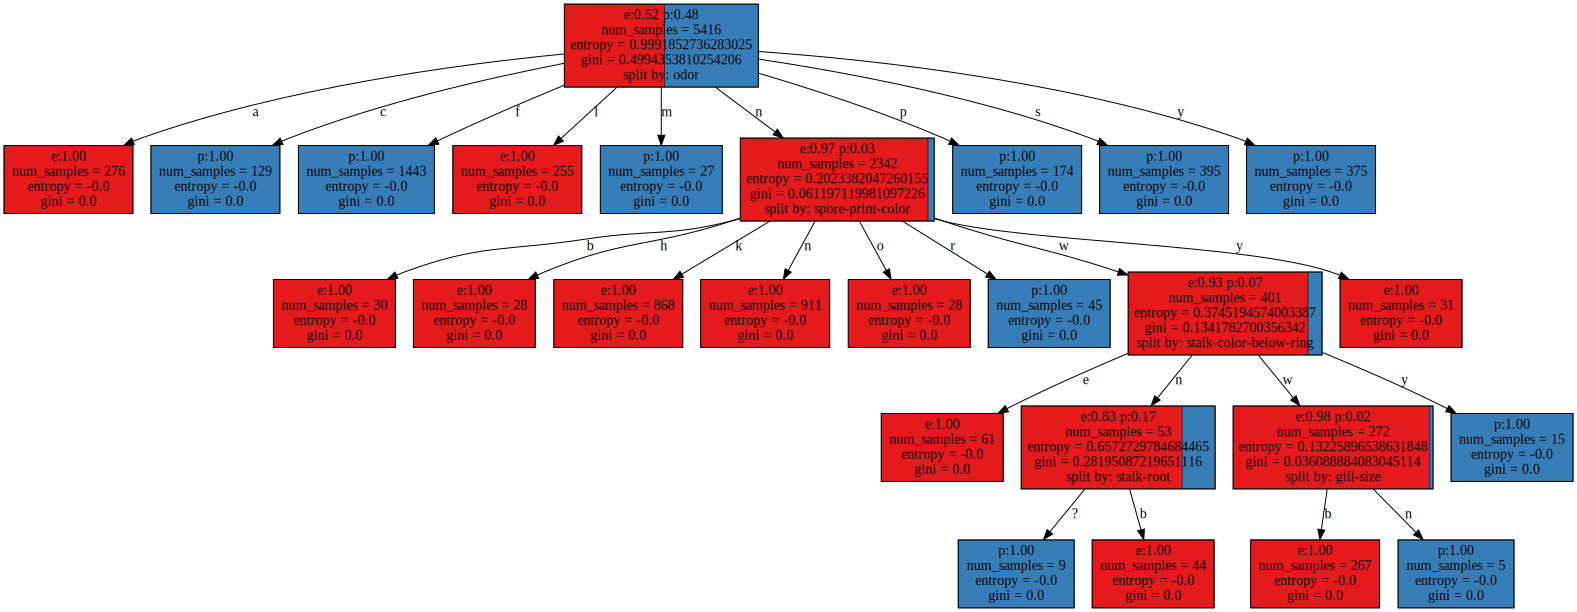

In [70]:
mushroom_tree_gini.draw()

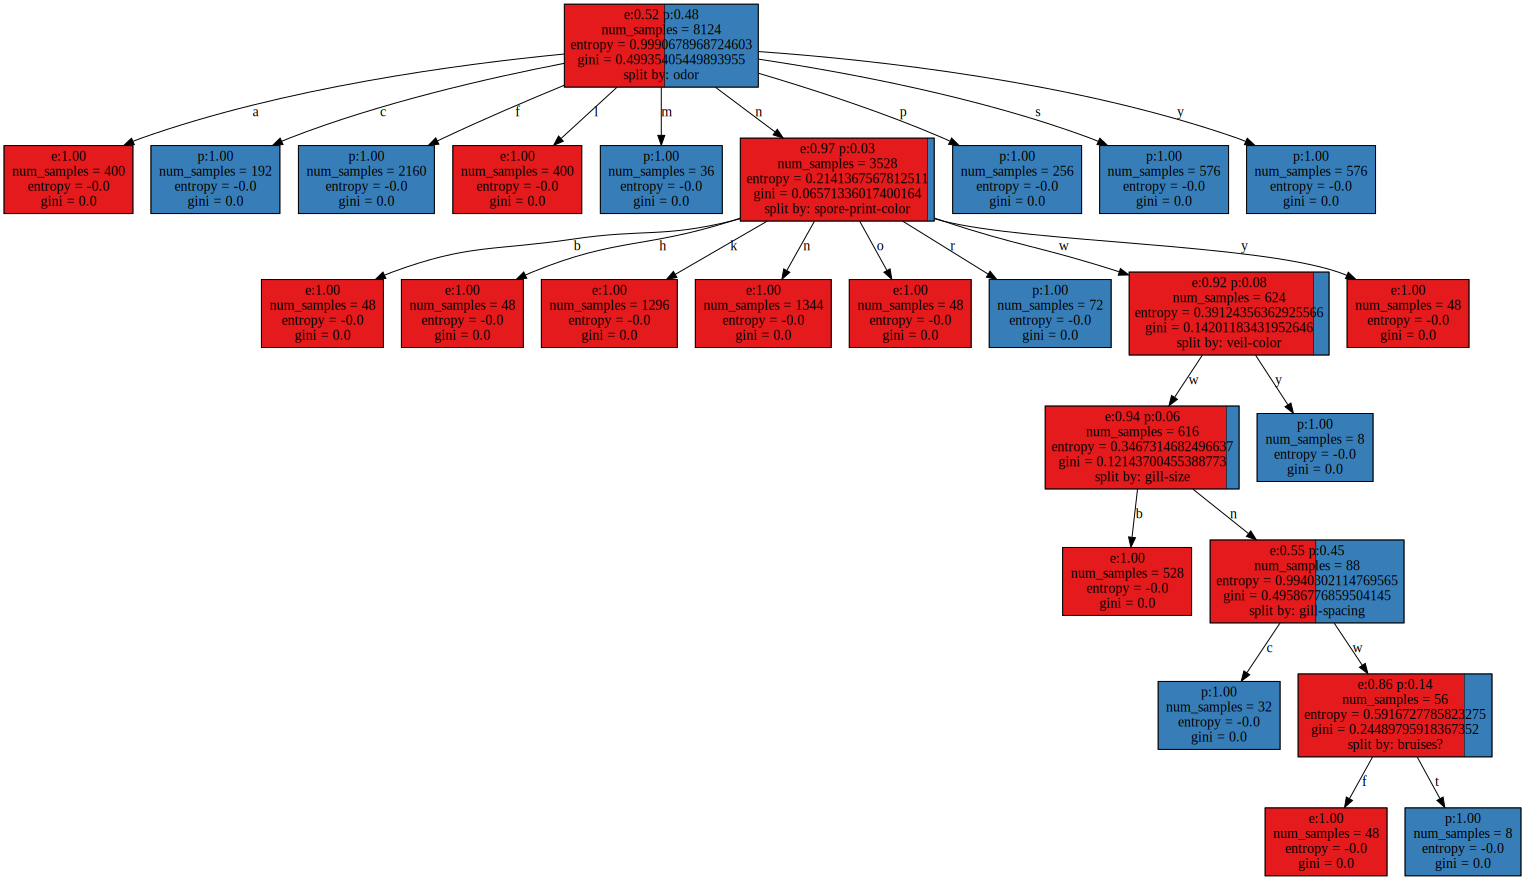

In [16]:
mushroom_tree_entropy.draw()

In [76]:
mushroom_tree_gini.prune_with_confidence_interval()
mushroom_tree_entropy.prune_with_confidence_interval()

In [77]:
print(f'Err for prunned gini {get_tree_error(mushroom_tree_gini, mushroom_df)}%')
print(f'Err for prunned entropy {get_tree_error(mushroom_tree_entropy, mushroom_df)}%')

Err for prunned gini 0%
Err for prunned entropy 0%


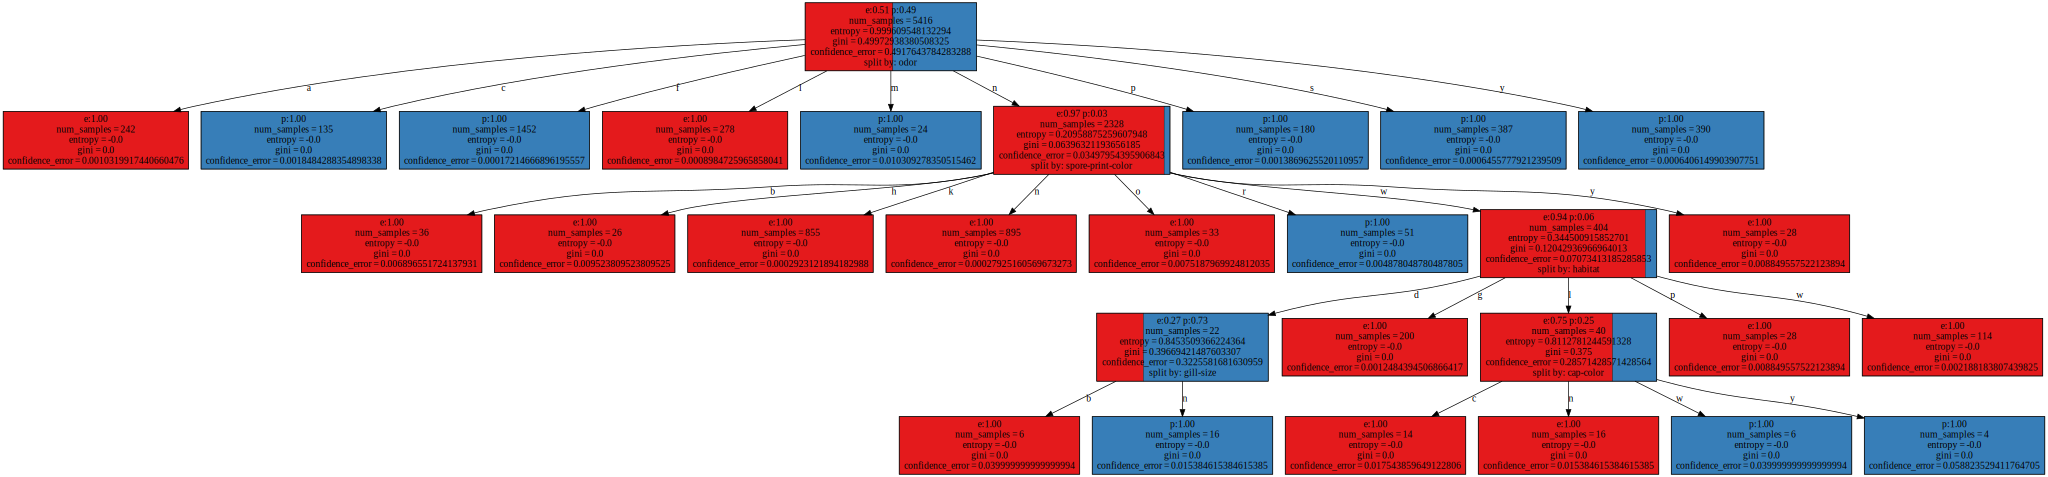

In [78]:
mushroom_tree_gini.draw()

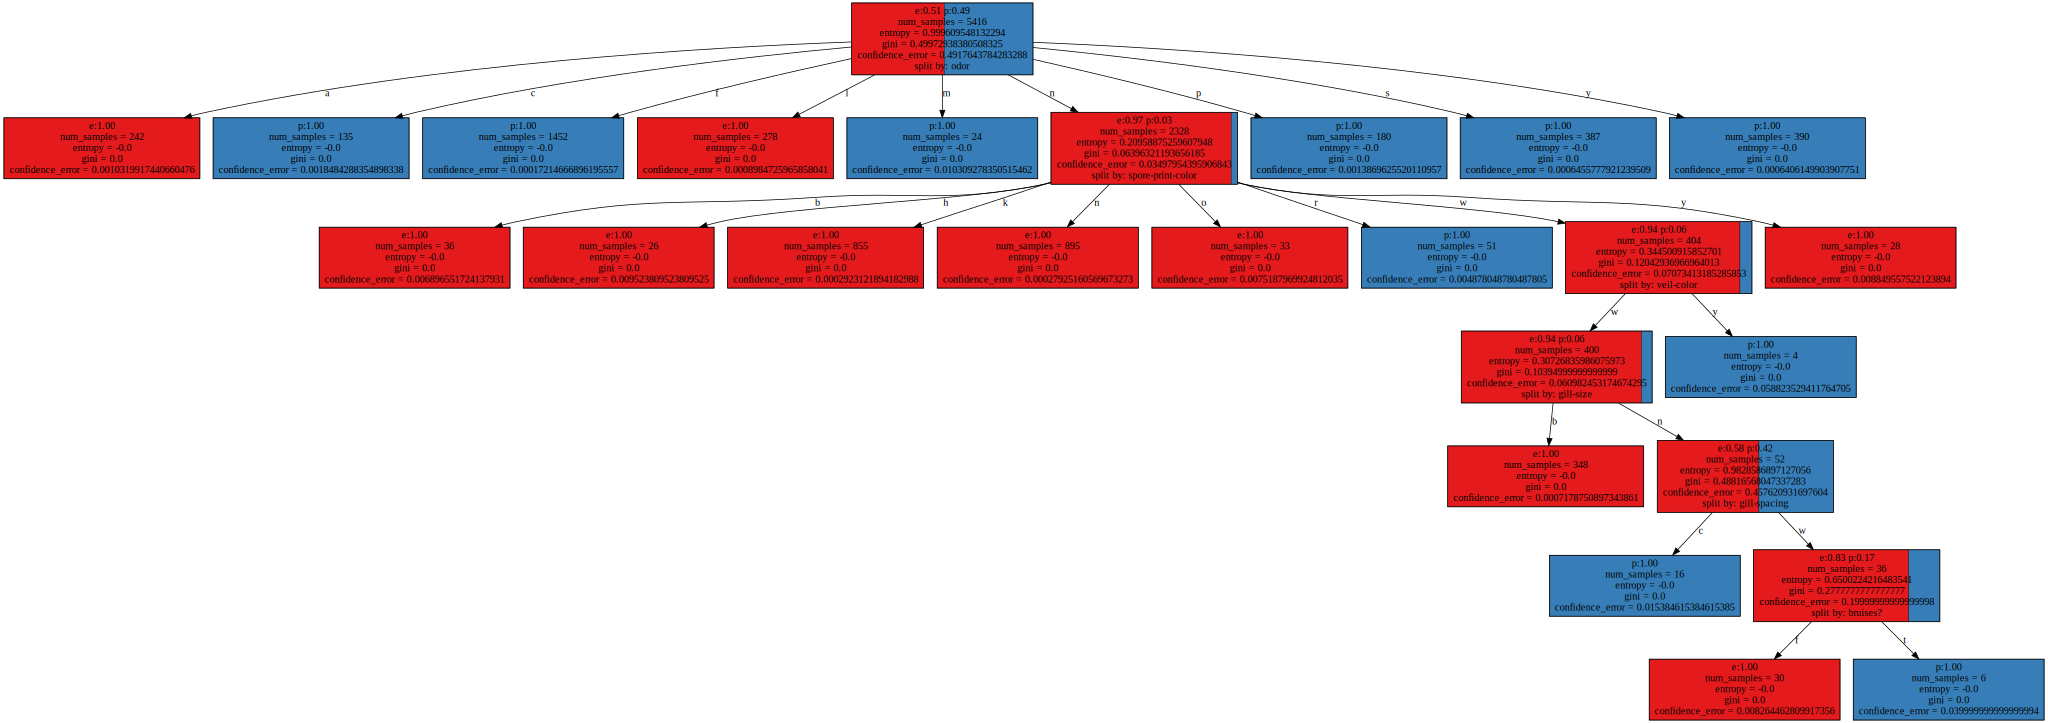

In [79]:
mushroom_tree_entropy.draw()

# 2. Cars DS

In [81]:
cars_df = pd.read_csv('data/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'])
X_cars_train, X_cars_test = train_test_split(cars_df, test_size=0.3333)
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [82]:
cars_tree_entropy = DecisionTree.Tree(X_cars_train, criterion='infogain')
cars_tree_gini = DecisionTree.Tree(X_cars_train, criterion='gini')

In [83]:
print(f'Err for gini {get_tree_error(cars_tree_gini, X_cars_test)}%')
print(f'Err for entropy {get_tree_error(cars_tree_entropy, X_cars_test)}%')

Err for gini 5.555555555555555%
Err for entropy 6.076388888888888%


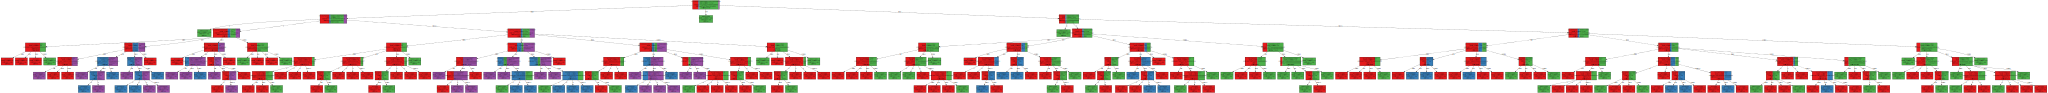

In [84]:
cars_tree_entropy.draw()

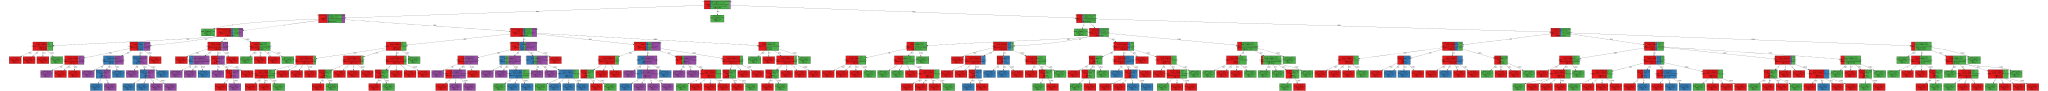

In [85]:
cars_tree_gini.draw()

In [86]:
cars_tree_entropy.prune_with_confidence_interval()
cars_tree_gini.prune_with_confidence_interval()

In [87]:
print(f'Err for prunned gini {get_tree_error(cars_tree_gini, cars_df)}%')
print(f'Err for prunned entropy {get_tree_error(cars_tree_entropy, cars_df)}%')

Err for prunned gini 29.976851851851855%
Err for prunned entropy 29.976851851851855%


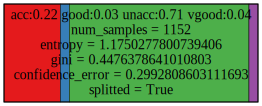

In [88]:
cars_tree_entropy.draw()

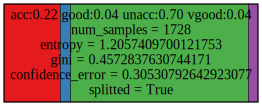

In [62]:
cars_tree_gini.draw()